# DS-210: Programming for Data Science


# Lecture 7:<br>&nbsp;&nbsp;&nbsp;• Clustering<br>&nbsp;&nbsp;&nbsp;• $k$–means with SciPy


## Attendance Poll: https://piazza.com/class/lcozftbxn0cy9/post/36

## Clustering

### General idea

- **Input:** set of objects
- Some information about relationship between them
- **Goal:** partition the objects into groups of similar objects

<br><br>
<div align="center">
    <b>Clearly: unsupervised learning</b>
</div>



### Why clustering?

* Discover similar cases<br>

* Make sense of data<br>

* Reduce data size<br>

## Examples of popular types of clustering

* correlation clustering (discovers the optimal number of clusters on its own, does not make sense for all problems but can be useful if the optimization metric rewards the creation of clusters with multiple points).

* Hierarchical clustering (HC). Can be bottoms up (agglomerative: merge points into clusters), or top down (divisive: divide clusters into subclusters).  $k$-means (to be covered today) is a divisive clustering algorithm.

## $k$–means

* $k$ is the target number of clusters<br><br>

* **Input:** set $S$ of points in $\mathbb R^n$<br><br>

* **Euclidean between points:**
$$\mbox{dist}(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

* **Ideal solution:** set $\mathcal C \subseteq \mathbb R^n$ of $k$ points that minimize
$$\sum_{x \in S} \min_{c \in \mathcal C}
(\mbox{dist}(x,c))^2$$<br><br>
(points in $\mathcal C$ are <i>cluster centers</i>)

* **Clusters:**
  - Assign each point $x \in S$ to the closest $c \in \mathcal C$
  - One cluster for each $c \in \mathcal C$:<br>the points assigned to it

### Reality

* [NP–hard](https://www.imsc.res.in/~meena/papers/kmeans.pdf) 

* Likely exponential time needed

### Typical heuristic

  1. *Seeding*: Start from some solution $\mathcal C$
  
  1. Keep improving $\mathcal C$ until satisfied

## Part 1: Initial solution (seeding)

### Example 1: random assignment

* Option 1: select $k$ points from $S$
  - likely to focus on the more populous parts of the data set

* Option 2: select $k$ points from the area to which points belong
  - points might end up outside of the area of interest
  - points may not be a minimum for any point in $S$

### Example 2: $k$–means$++$

* very popular heuristic

* iterative (i.e., add points one by one):

  - given current $\mathcal C$, assign weights to all points in $S$
  
  - $\mbox{weight(x)} = \min_{c \in \mathcal C} (\mbox{dist}(x,c))^2$
  
  - draw next point with probabilities proportional to the weights

* relatively good approximation in expectation
* If you want the gory details: http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf

## Part 2: Iterative improvement

### Typical iteration

* Assign each point in $x \in S$ to the closest center $c \in \mathcal C$

* For each $c \in \mathcal C$:
  - let $S_c$ be points assigned to $C$
  - move $c$ to 
    $$ \frac{1}{|S_c|}\sum_{y \in S_c} y$$
    if $S_c$ is not empty
  - Note: the new location minimizes
  $$\sum_{x \in S_c} (\mbox{dist}(x,c))^2$$
  - You can also some noise to the calculation of $c$ to improve odds of avoiding local minima.

### When to stop

* fixed number of steps?

* the solution has stopped improving?

### General problems

* may get stuck in a local minimum

* may improve very slowly

* possibly good ideas:
  - try different seeding methods
  - run multiple times from different starting points

## Example: Reduce number of colors in an image

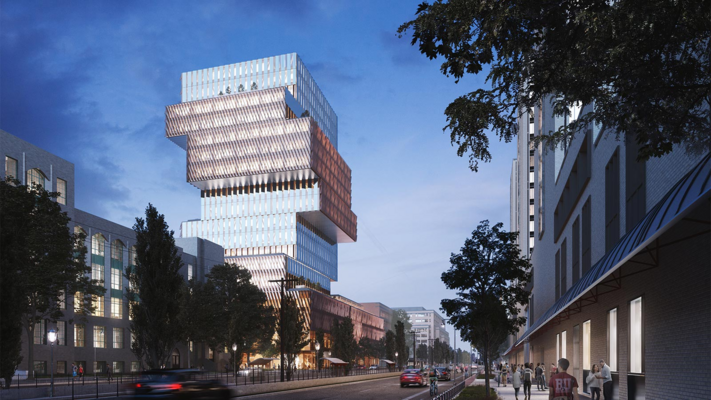

In [1]:
# PIL usually distributed as "Pillow"
# If you don't have it: pip3 install Pillow
from PIL import Image
import numpy as np
image = Image.open("cds.png")
image

### Typical color representation: RGB

* $(\mbox{red},\mbox{green},\mbox{blue})$, each in $0\ldots255$
* `uint8` = 8 bits = 1 byte

In [3]:
# Turn the image into a numpy array
arr = np.asarray(image)
print(arr.shape)
## drop additional transparency channel (alpha)
arr = arr[:,:,:3]
print(arr.shape)
arr

(400, 711, 4)
(400, 711, 3)


array([[[ 53,  82, 152],
        [ 52,  82, 152],
        [ 50,  80, 152],
        ...,
        [ 13,  13,  11],
        [ 12,  12,  10],
        [ 18,  18,  16]],

       [[ 56,  85, 156],
        [ 52,  81, 152],
        [ 51,  81, 153],
        ...,
        [ 14,  14,  12],
        [ 15,  15,  13],
        [ 18,  18,  16]],

       [[ 57,  85, 158],
        [ 52,  81, 153],
        [ 52,  82, 154],
        ...,
        [ 14,  14,  12],
        [ 14,  14,  12],
        [ 18,  18,  16]],

       ...,

       [[ 45,  47,  62],
        [ 39,  41,  56],
        [ 39,  41,  56],
        ...,
        [ 55,  58,  73],
        [ 55,  58,  73],
        [ 61,  64,  80]],

       [[ 48,  50,  63],
        [ 41,  43,  57],
        [ 41,  43,  56],
        ...,
        [ 50,  53,  67],
        [ 53,  57,  74],
        [ 57,  63,  81]],

       [[ 47,  49,  62],
        [ 41,  43,  56],
        [ 39,  41,  54],
        ...,
        [ 42,  44,  59],
        [ 39,  43,  61],
        [ 43,  50,  69]]

## Example: Reduce number of colors in an image

In [4]:
# save dimensions
height,width,color_dim = arr.shape
# turn into a "1D" array of pixels
arr = arr.reshape(400*711,color_dim)
arr

array([[ 53,  82, 152],
       [ 52,  82, 152],
       [ 50,  80, 152],
       ...,
       [ 42,  44,  59],
       [ 39,  43,  61],
       [ 43,  50,  69]], dtype=uint8)

In [5]:
from scipy.cluster.vq import kmeans, kmeans2
arr = arr.astype(np.float32)
codebook,_ = kmeans(arr,2)
codebook2,_ = kmeans2(arr,2,minit='++')
codebook3 = np.array([[200,200,50], [50,50,200]])
print(codebook)
print(codebook2)
print(codebook3)

[[ 45.045956  44.756474  50.888287]
 [131.57532  154.25316  194.67773 ]]
[[ 46.017075  45.8927    52.562565]
 [132.7811   155.89322  196.60661 ]]
[[200 200  50]
 [ 50  50 200]]


## Example: Reduce number of colors in an image

In [6]:
# assign closest center to each pixel
from scipy.cluster.vq import vq
# create new array the tells use which codebook entry
# is to be used for each pixel
encoding,_ = vq(arr,codebook)
encoding2,_ = vq(arr,codebook2)
encoding3,_ = vq(arr,codebook3)
print(encoding)
print(encoding2)
print(encoding3)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]


In [7]:
# make color coordinates small integers
codebook = codebook.astype(np.uint8)
codebook2 = codebook2.astype(np.uint8)
codebook3 = codebook3.astype(np.uint8)
print(codebook)
print(codebook2)
print(codebook3)


[[ 45  44  50]
 [131 154 194]]
[[ 46  45  52]
 [132 155 196]]
[[200 200  50]
 [ 50  50 200]]


In [8]:
# Build new array by map entries to closest colors
newarr = [codebook[entry] for entry in encoding]
newarr = np.array(newarr)
print(newarr.shape)
newarr2 = [codebook2[entry] for entry in encoding2]
newarr2 = np.array(newarr2)
print(newarr2.shape)
newarr3 = [codebook3[entry] for entry in encoding3]
newarr3 = np.array(newarr3)
print(newarr3.shape)
rng = np.random.default_rng()
newarr4 = [codebook3[int(rng.random(1)*2)] for entry in encoding3]
newarr4 = np.array(newarr4)
print(newarr4.shape)

(284400, 3)
(284400, 3)
(284400, 3)
(284400, 3)


In [9]:
# Make the new arrays to be the right shape
newarr = newarr.reshape(height,width,color_dim)
newarr2 = newarr2.reshape(height,width,color_dim)
newarr3 = newarr3.reshape(height,width,color_dim)
newarr4 = newarr4.reshape(height,width,color_dim)


## Example: Reduce number of colors in an image

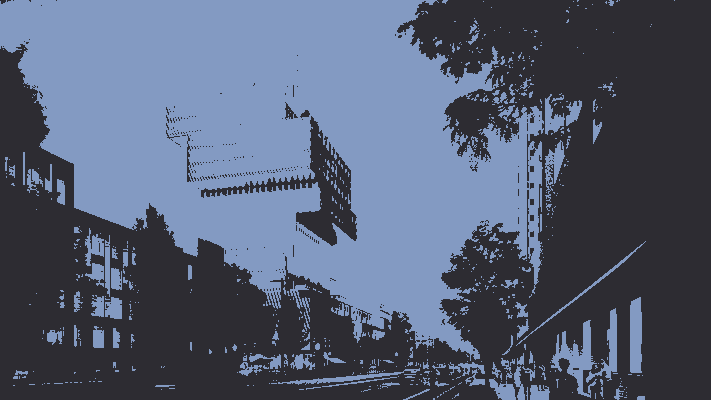

In [10]:
image = Image.fromarray(newarr)
image.save("test.png")
image

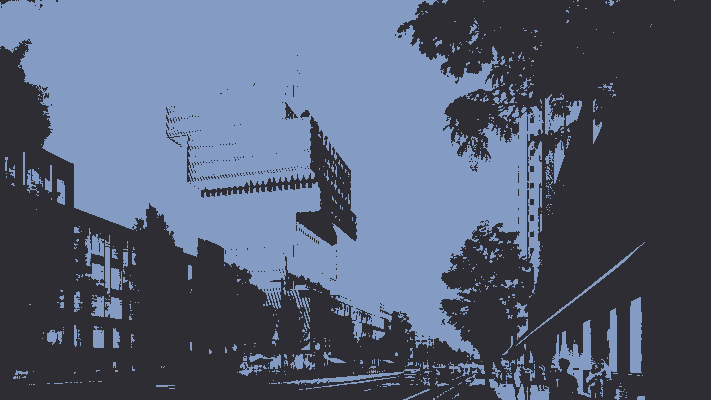

In [11]:
image2 = Image.fromarray(newarr2)
image2.save("test2.png")
image2

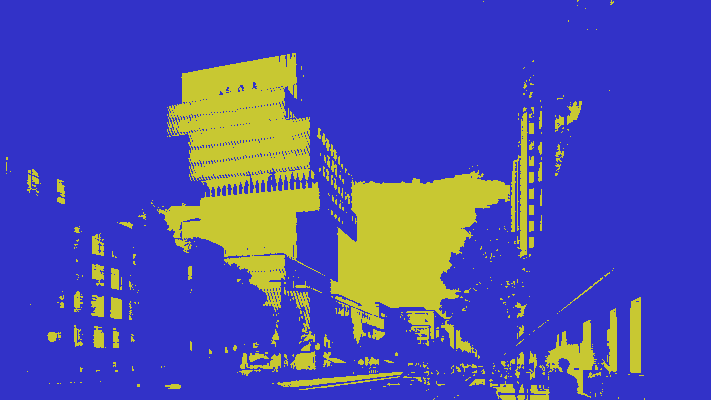

In [12]:
image = Image.fromarray(newarr3)
image.save("test.png")
image

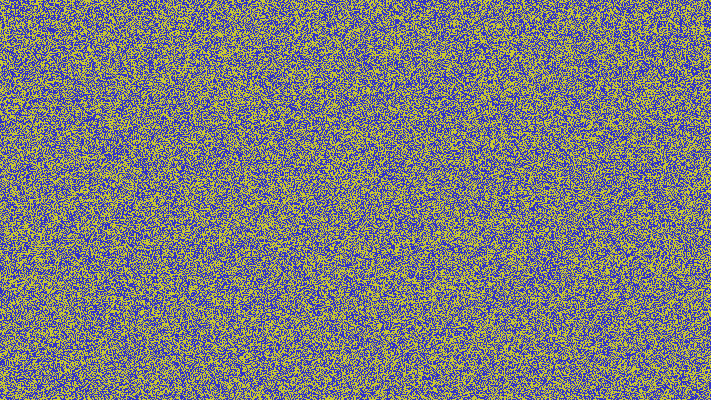

In [13]:
image = Image.fromarray(newarr4)
image.save("test.png")
image

## Final comments

### Warning: Normalizing your data may be useful or crucial

* You have to make sure that all relevant coordinates have some impact

* **Sample solution:** make the variance / standard deviation of each coordinate identical

* Implemented as `scipy.cluster.vq.whiten`

### Some $k$–means implementations

* Two implementations in SciPy
  
  - `scipy.cluster.vq.kmeans`

  - `scipy.cluster.vq.kmeans2`

* `scikit-learn`: `sklearn.cluster.KMeans`

* Feel free to experiment to see which one is better